# Python Assignment 3
**Aaditya Bahadkar SBU ID: 116507981**


## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is always positive for all $k$.

### Step 0: Analytical Gradient and Minimum

The given function is:

$$
f(x) = \sqrt{x^2 + 5}
$$

To find the gradient, compute the derivative of $ f(x) $:

$$
f'(x) = \frac{d}{dx} \sqrt{x^2 + 5} = \frac{x}{\sqrt{x^2 + 5}}
$$

The function $ f(x) $ is minimized when the gradient $ f'(x) = 0 $, which occurs at $ x = 0 $. At this point, the minimum value of$ f(x) $ is:

$$
f(0) = \sqrt{0^2 + 5} = \sqrt{5}
$$


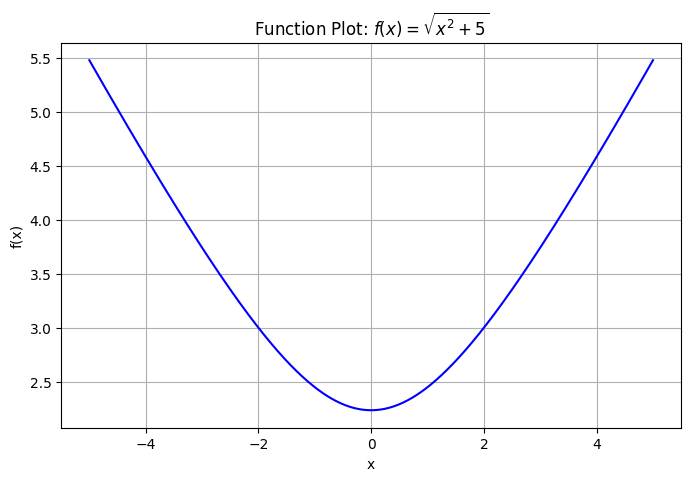

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    """The function f(x) = sqrt(x^2 + 5)."""
    return np.sqrt(x**2 + 5)

# Plot the function over [-5, 5]
x_range = np.linspace(-5, 5, 500)  # Generate 500 points in [-5, 5]
plt.figure(figsize=(8, 5))
plt.plot(x_range, f(x_range), label=r"$f(x) = \sqrt{x^2 + 5}$", color="blue")
plt.title("Function Plot: $f(x) = \sqrt{x^2 + 5}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()


The value of x_T (after 50 iterations) is: 0.0000
The minimum value of f(x) after 50 iterations is: 2.2361


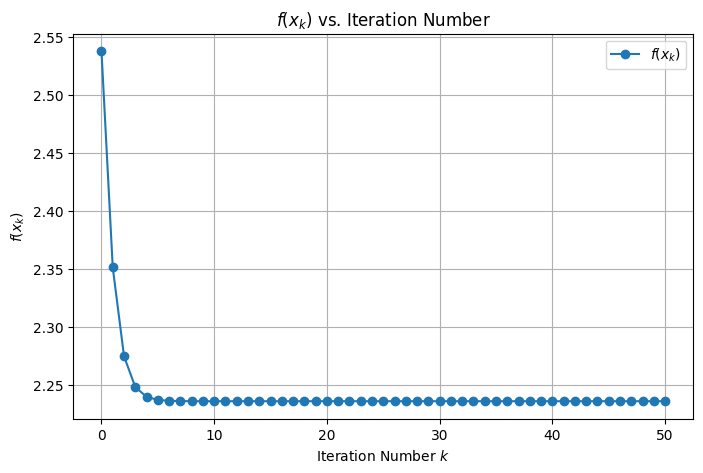

In [3]:
# Define the derivative (gradient) of f(x)
def grad_f(x):
    return x / np.sqrt(x**2 + 5)

# Define the Gradient Descent Algorithm
def gradient_descent(x_0, step_size, num_iterations):
    x_values = [x_0]  # Start with the initial guess
    for _ in range(num_iterations):
        grad = grad_f(x_values[-1])  # Compute gradient at current x
        new_x = x_values[-1] - step_size * grad  # Update x
        x_values.append(new_x)  # Record new x value
    return np.array(x_values)

# Perform Gradient Descent with the specified parameters
sb_id_last_digit = 1  # My SB ID ends with 1
x_0 = sb_id_last_digit / 5 + 1  # Initial guess x_0 = 1/5 + 1 = 1.2
step_size = 1  # Step size α
num_iterations = 50  # Number of iterations T

x_values = gradient_descent(x_0, step_size, num_iterations)

x_T = x_values[-1]
print(f"The value of x_T (after {num_iterations} iterations) is: {x_T:.4f}")
print(f"The minimum value of f(x) after {num_iterations} iterations is: {f(x_T):.4f}")

# Plot f(x_k) vs. iteration number
f_values = f(x_values)  # Compute function values for all x_k
plt.figure(figsize=(8, 5))
plt.plot(range(len(f_values)), f_values, marker="o", label=r"$f(x_k)$")
plt.title("$f(x_k)$ vs. Iteration Number")
plt.xlabel("Iteration Number $k$")
plt.ylabel("$f(x_k)$")
plt.grid()
plt.legend()
plt.show()

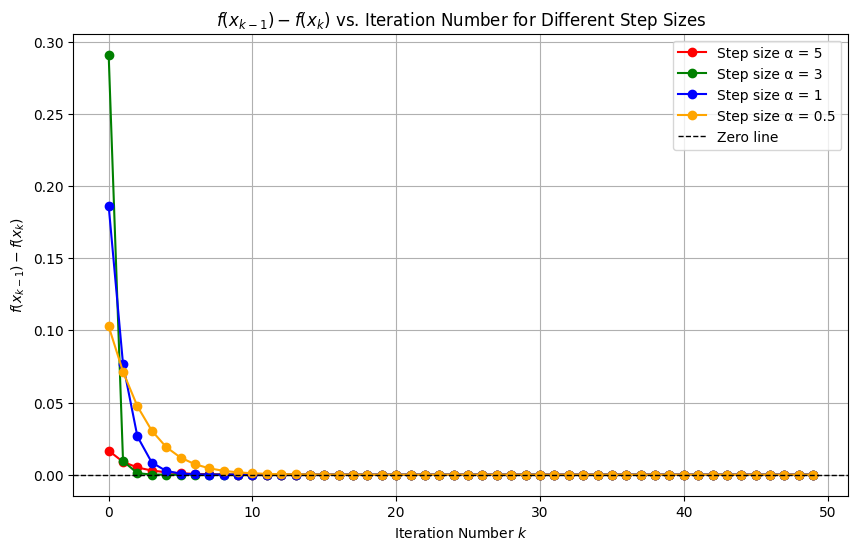

In [4]:
# Perform Gradient Descent for different step sizes
step_sizes = [5, 3, 1, 0.5]
colors = ['red', 'green', 'blue', 'orange']  # Colors for the plots
plt.figure(figsize=(10, 6))

# Loop through each step size and plot f(x_{k-1}) - f(x_k)
for alpha, color in zip(step_sizes, colors):
    x_vals = gradient_descent(x_0, alpha, num_iterations)  # Perform GD
    f_vals = f(x_vals)  # Compute function values
    f_diff = f_vals[:-1] - f_vals[1:]  # Compute f(x_{k-1}) - f(x_k)
    plt.plot(range(len(f_diff)), f_diff, marker="o", color=color, label=f"Step size α = {alpha}")

plt.title("$f(x_{k-1}) - f(x_k)$ vs. Iteration Number for Different Step Sizes")
plt.xlabel("Iteration Number $k$")
plt.ylabel("$f(x_{k-1}) - f(x_k)$")
plt.axhline(0, color='black', linestyle='--', linewidth=1, label="Zero line")
plt.grid()
plt.legend()
plt.show()

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data.

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane.


### Explanation of Linear Regression on 2D Data

To include the intercept term in the linear regression model, a column of ones is appended to the feature matrix \( X \):

$$
X_{\text{bias}} =
\begin{bmatrix}
1 & x_{11} & x_{12} \\
1 & x_{21} & x_{22} \\
\vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2}
\end{bmatrix}
$$

This bias term accounts for the intercept in the regression equation.

---
Solve the Normal Equation

The **normal equation** provides the optimal weights for linear regression:

$$
\theta = (X_{\text{bias}}^T X_{\text{bias}})^{-1} X_{\text{bias}}^T y
$$

Here:
- $ \theta $ contains the intercept $( \theta_0 )$ and feature coefficients $( \theta_1, \theta_2 )$.


---
Plot the Regression Plane

To visualize the regression model, we calculate the regression plane using:

$$
y_{\text{plane}} = \theta_0 + \theta_1 x_1 + \theta_2 x_2
$$

We use a **meshgrid** of $ x_1 $ and $ x_2 $ values to compute $y_{\text{plane}} $ across the feature space.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Generate synthetic data
np.random.seed(81)  # Last two digits of my student ID
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias term
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Use the normal equation to find the regression coefficients
theta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

# Extract the coefficients and intercept
intercept = theta[0]  # Intercept (bias term)
coefficients = theta[1:]  # Coefficients for the features
print(f"Intercept (bias): {intercept:.4f}")
print(f"Coefficients (weights): {coefficients}")

Intercept (bias): 4.0770
Coefficients (weights): [4.11387686 0.43535783]


3D Visualization

- **Data Points**: Use `scatter` to plot the original data points in 3D space.
- **Regression Plane**: Use `plot_surface` to draw the regression plane over the range of $ x_1 $ and $ x_2 $.

The regression plane provides a visual representation of the linear model fitted to the 2D data.

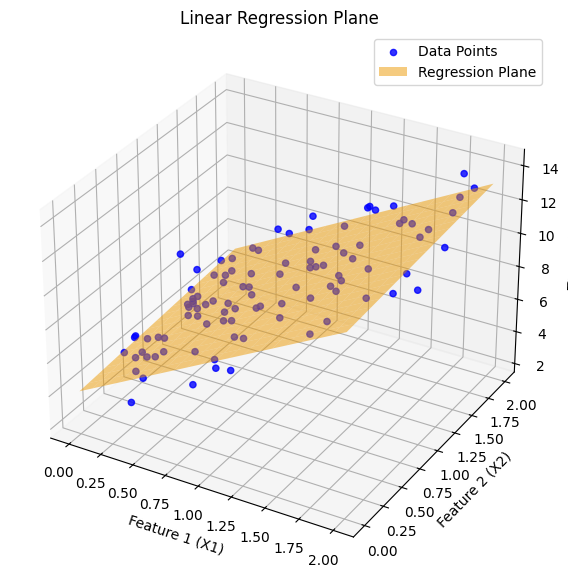

In [8]:
# Plot the generated data and regression plane
x1 = np.linspace(0, 2, 20)  # Range for the first feature
x2 = np.linspace(0, 2, 20)  # Range for the second feature
x1_grid, x2_grid = np.meshgrid(x1, x2)  # Create a meshgrid for x1 and x2

# Compute the predicted y values for the plane
y_plane = intercept + coefficients[0] * x1_grid + coefficients[1] * x2_grid

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label="Data Points", alpha=0.8)

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_plane, color='orange', alpha=0.5, label="Regression Plane")
ax.set_title("Linear Regression Plane")
ax.set_xlabel("Feature 1 (X1)")
ax.set_ylabel("Feature 2 (X2)")
ax.set_zlabel("Target (y)")
ax.legend(loc='best')

plt.show()


## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


np.random.seed(595)
X = np.random.rand(2, 100)  # Generate 100 random 2D points
w_true = np.array([1.5, -2.5])  # True weights for generating the labels
b_true = 1.0  # True bias
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)  # Calculate probabilities using the true weights and bias
Y = (probabilities > 0.5).astype(int)  # Generate binary labels based on the probabilities
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)  # Add some noise to the data

X_train, X_test = X[:,:80], X[:,80:]  # Use 80 samples for training, 20 for testing
Y_train, Y_test = Y[:80], Y[80:]  # Corresponding labels for train/test

w = np.zeros(X.shape[0])  # Initialize weights as zeros (2D)
b = 0.0  # Initialize bias as zero
learning_rate = 1  # Tuned the learning rate and number of epochs
num_epochs = 100

for epoch in range(num_epochs):
    A_train = sigmoid(np.dot(w.T, X_train) + b)  # Compute predictions (probabilities)

    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)  # Gradient w.r.t weights
    dJdb = np.mean(A_train - Y_train)  # Gradient w.r.t bias

    w -= learning_rate * dJdw  # Update weights using gradient descent
    b -= learning_rate * dJdb  # Update bias using gradient descent

A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)

A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

train_accuracy = np.mean(predictions_train == Y_train)
test_accuracy = np.mean(predictions_test == Y_test)

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")



Training Set Accuracy: 0.88
Test Set Accuracy: 1.00


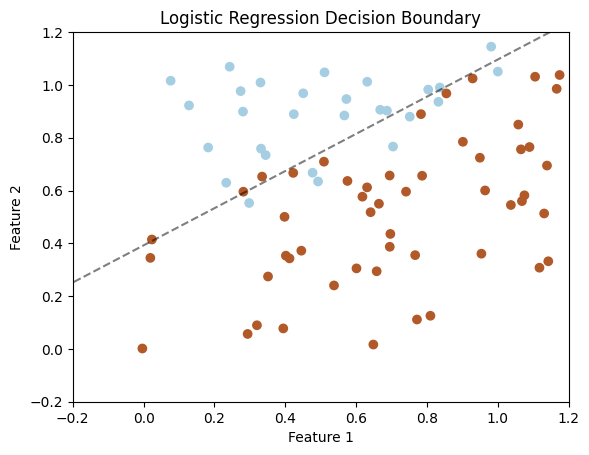

In [27]:
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

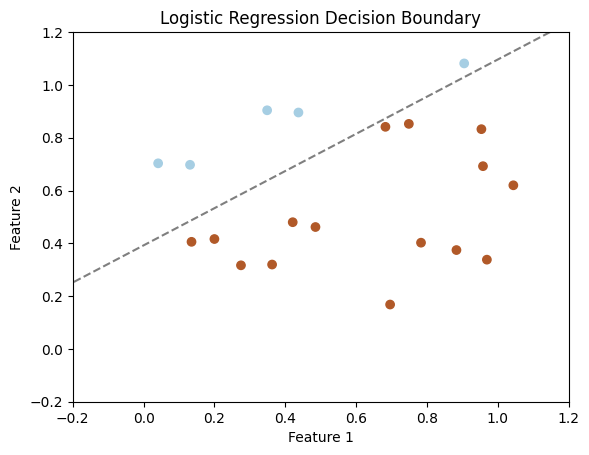

In [28]:
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

### After tuning the hyperparameters:

- Best Learning Rate: 1.0
- Best Number of Epochs: 100
- Training Accuracy: 0.88
- Test Accuracy: 1.00

The decision boundary effectively separates the two classes, as seen in the two plots.
